In [ ]:
#########################################################################################
# Using the df_clean.csv file for the Visualization
# - PIE Chart to show composition of the elements in each Dataset (EMPA & Laser)
# - Bar Charts to show the distirbution of the elements across the 3 Age Groups
# - Correlation Heatmap to show the pairs of strongly related elements
# - Scatter Plot to show visually how the paired elements relate across the Age Groups
#########################################################################################

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Setting Paths for the files generated
ROOT = Path("/content/drive/MyDrive/Intro2Prog")
# DATA_RAW = ROOT / "Data_Raw"
DATA_CLEAN = ROOT / "Data_Clean"
FIG_DIR = ROOT / "Figures"

# DATA_RAW.mkdir(parents=True, exist_ok=True)
# DATA_CLEAN.mkdir(parents=True, exist_ok=True)
FIG_DIR.mkdir(parents=True, exist_ok=True)

# Load raw data
#!ls -al '/content/drive/MyDrive/'

Mounted at /content/drive


In [ ]:
# Loading the cleaned data file created from DataCleaningNGraphs
df = pd.read_csv(DATA_CLEAN / "df_cleaned.csv")

In [ ]:
# Define the 2 Datasets EMPA and Laser as per the layout in the assignment
# For EMPA - there are missing columns - NiO, F, V2O3, ZnO, Li2O
# But our focus is on the [Ali Spreadsheet]- the main sheet
EMPA_COLS = [
    "CaO", "SiO2", "Cr2O3", "Na2O", "TiO2",
    "MnO", "MgO", "FeO", "Al2O3", "K2O"
]

LASER_COLS = [
    "Mg#", "Li", "Be", "B", "Mg", "Si", "Ca", "Sc", "Ti", "V", "Cr",
    "Mn", "Co", "Ni", "Cu", "Rb", "Sr", "Y", "Zr", "Nb", "Cs", "Ba", "La",
    "Ce", "Pr", "Nd", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb",
    "Lu", "Hf", "Ta", "Pb", "Th", "U"
]

# Performing a Dtype check on them before cleaning
print(df[EMPA_COLS].dtypes)
print(df[LASER_COLS].dtypes)

CaO      float64
SiO2     float64
Cr2O3    float64
Na2O     float64
TiO2     float64
MnO      float64
MgO      float64
FeO      float64
Al2O3    float64
K2O      float64
dtype: object
Mg#    float64
Li     float64
Be     float64
B      float64
Mg     float64
Si     float64
Ca     float64
Sc     float64
Ti     float64
V      float64
Cr     float64
Mn     float64
Co     float64
Ni     float64
Cu     float64
Rb     float64
Sr     float64
Y      float64
Zr     float64
Nb     float64
Cs     float64
Ba     float64
La     float64
Ce     float64
Pr     float64
Nd     float64
Sm     float64
Eu     float64
Gd     float64
Tb     float64
Dy     float64
Ho     float64
Er     float64
Tm     float64
Yb     float64
Lu     float64
Hf     float64
Ta     float64
Pb     float64
Th     float64
U      float64
dtype: object


In [ ]:
# ###############################################################
# Data Visualization - EDA
# ###############################################################-------------------------------------------

In [ ]:
#
# We use std to list the top 10 most variable elements for the Laser dataset
# coz Laser has 41 elements - cant display all
# we need to scale that down to 10 - similar to that of EMPA
#
laser_std = df[LASER_COLS].std().sort_values(ascending=False)

# We then take the top 10 elements and assign them to top_elements.
top_n = min(10, len(laser_std))
top_elements = laser_std.head(top_n).index.tolist()

print(f"\\nTop {top_n} Most Variable Laser Elements (by standard deviation):")
for i, (element, std_val) in enumerate(laser_std.head(top_n).items(), 1):
    print(f"{i:2d}. {element:8s} std = {std_val:.2f}")


\nTop 10 Most Variable Laser Elements (by standard deviation):
 1. Mg       std = 16803.87
 2. Si       std = 13584.72
 3. Ti       std = 3164.91
 4. Ca       std = 2191.54
 5. Cr       std = 883.20
 6. Mn       std = 604.11
 7. Zr       std = 128.58
 8. Sr       std = 108.94
 9. V        std = 60.37
10. Ni       std = 44.20


\n3. Side-by-Side Comparison: EMPA vs Laser...


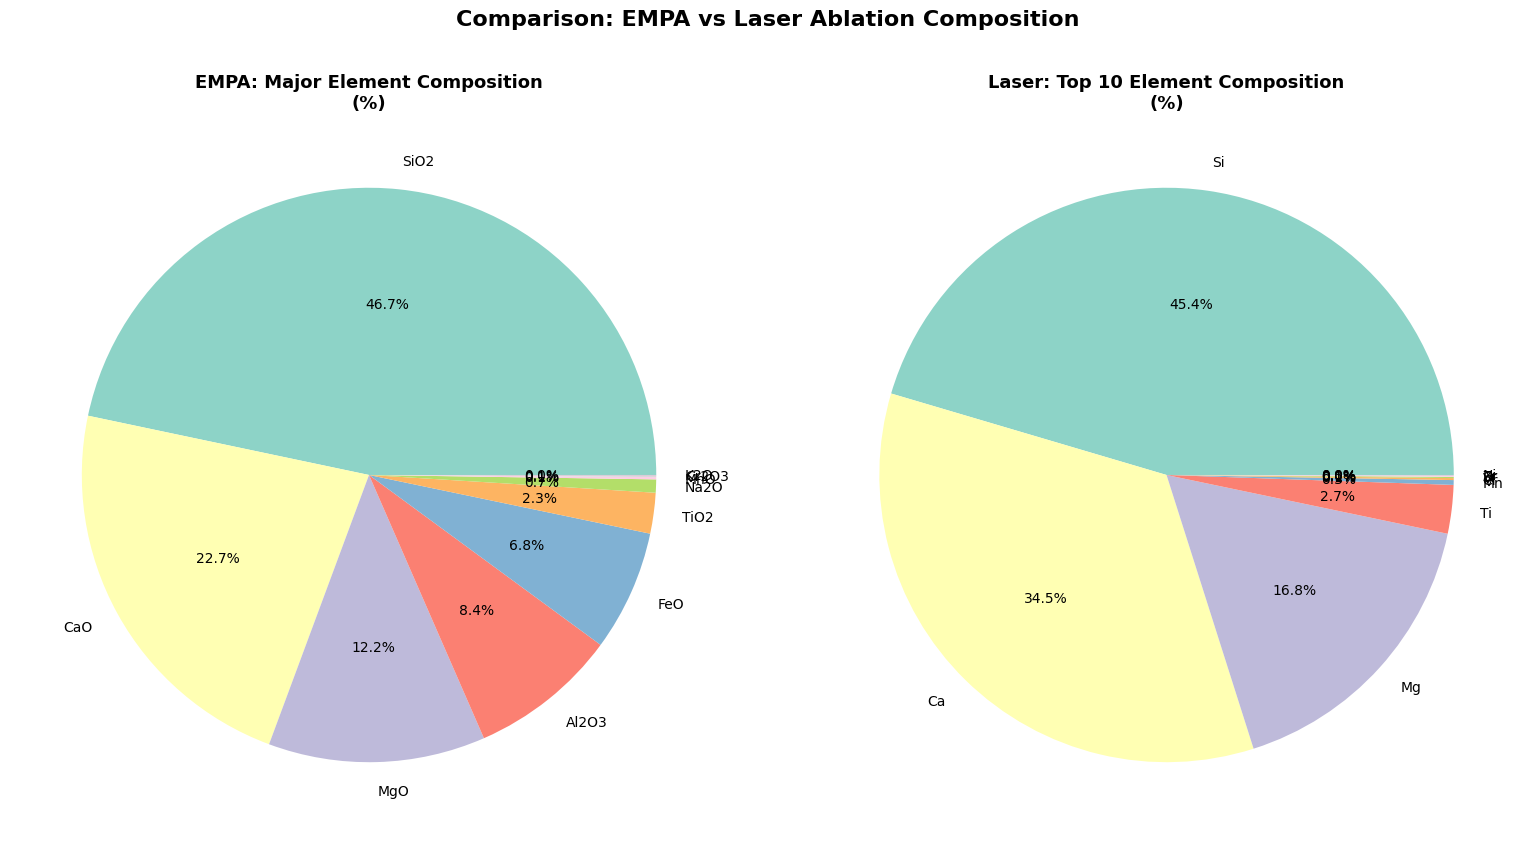

In [ ]:
#
# PIE CHARTS - to show the rock composition for each of
# the Dataset (EMPA sn Laser)
#
print("\\n3. Side-by-Side Comparison: EMPA vs Laser...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# LEFT: Pie Chart for EMPA - showing the rock composition
empa_means = df[EMPA_COLS].mean().sort_values(ascending=False)
ax1.pie(empa_means.values, labels=empa_means.index, autopct='%1.1f%%',
        colors=plt.cm.Set3(range(len(empa_means))))
ax1.set_title('EMPA: Major Element Composition\n(%)', fontsize=13, fontweight='bold')

# RIGHT: Pie Chart for Laser - showing the rock composition
# Using the top_elements to limit the elements to top 10 most variable elements
laser_means = df[top_elements].mean().sort_values(ascending=False)
ax2.pie(laser_means.values, labels=laser_means.index, autopct='%1.1f%%',
        colors=plt.cm.Set3(range(len(laser_means))))
ax2.set_title(f'Laser: Top {len(top_elements)} Element Composition\n(%)',
              fontsize=13, fontweight='bold')

plt.suptitle('Comparison: EMPA vs Laser Ablation Composition',
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig(FIG_DIR / "pie_comparison_empa_laser.png", dpi=300)
plt.show()


In [ ]:
#
# BAR CHARTS - Distribution Analysis
# To help us understand how the element's composition changes between
# the different Age Intervals(Age=1,Age=2, Age=3).
#

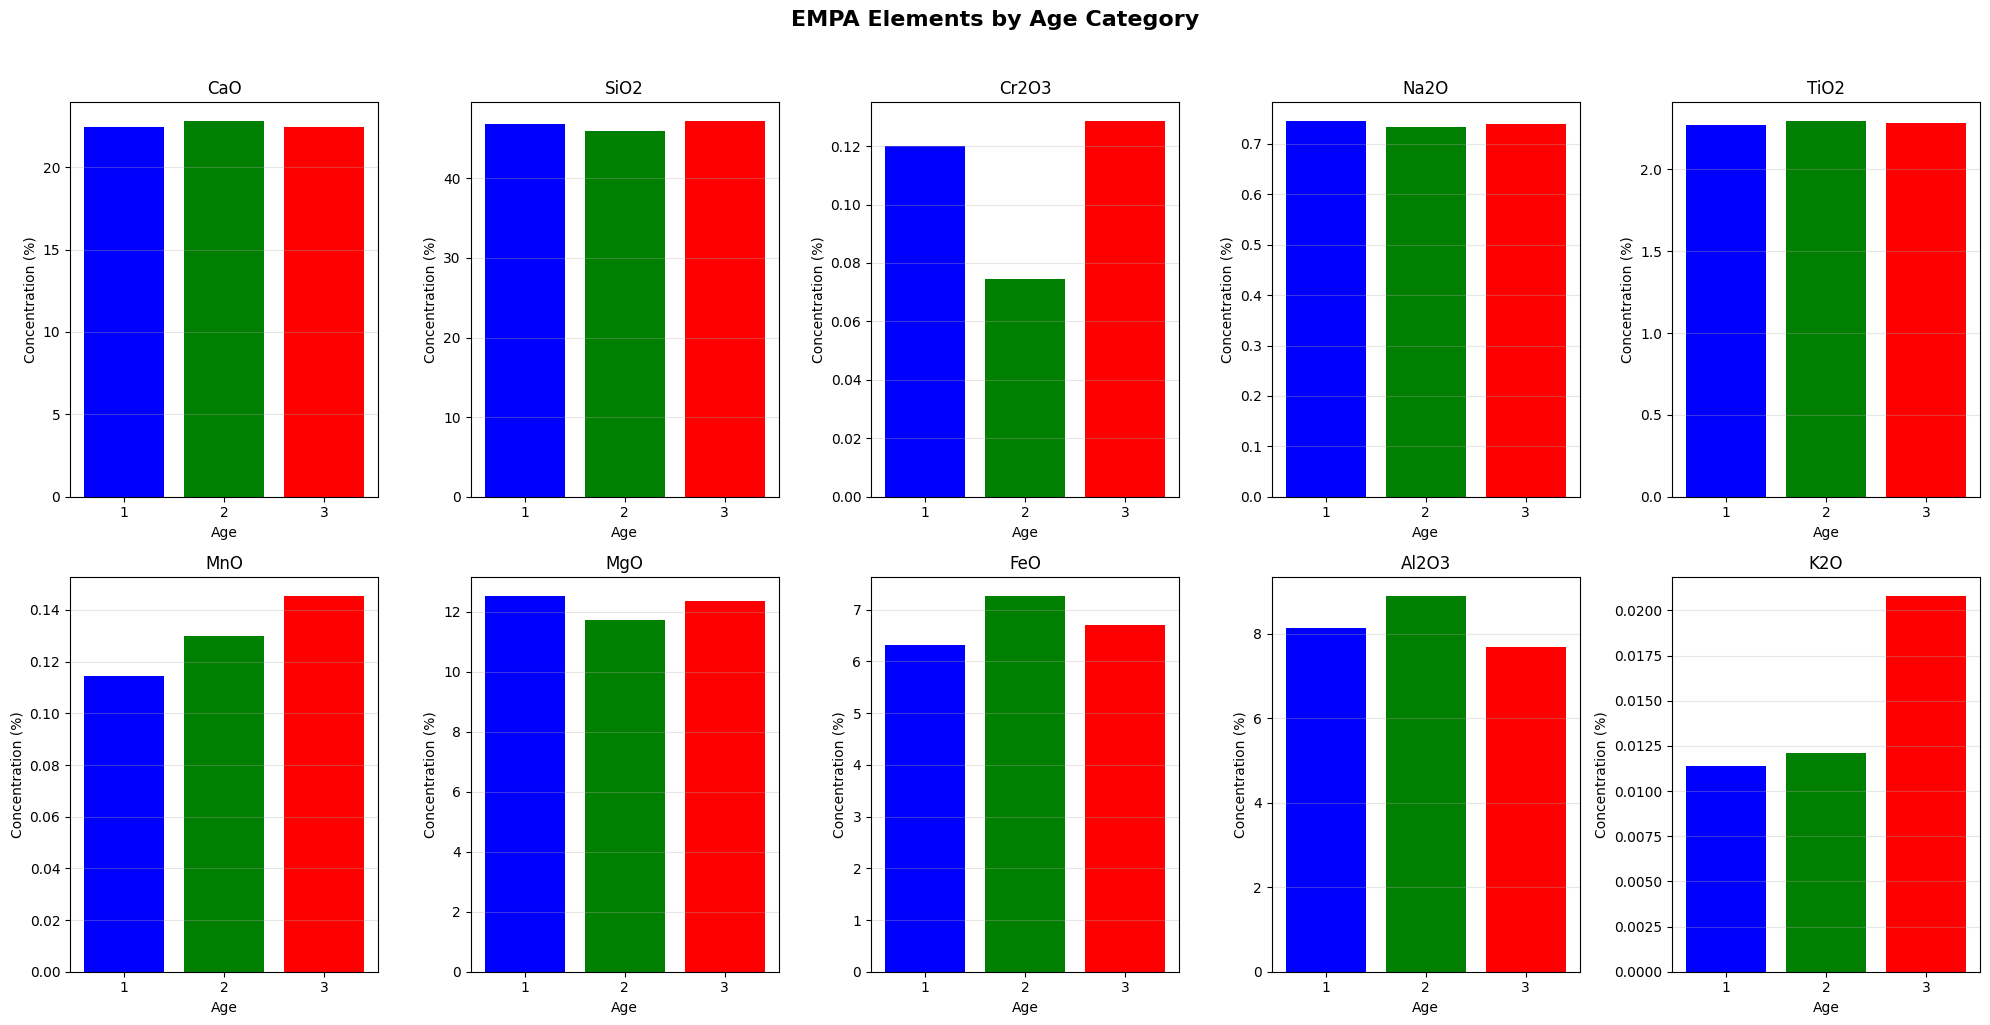

In [ ]:
# EMPA - BAR CHARTS: All elements by Age Category

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for idx, element in enumerate(EMPA_COLS):
    age_means = df.groupby('T')[element].mean()
    axes[idx].bar(age_means.index.astype(str), age_means.values, color=['blue', 'green', 'red'])
    axes[idx].set_title(element)
    axes[idx].set_xlabel('Age')
    axes[idx].set_ylabel('Concentration (%)')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('EMPA Elements by Age Category', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(FIG_DIR / "bar_all_empa_elements.png", dpi=300)
plt.show()

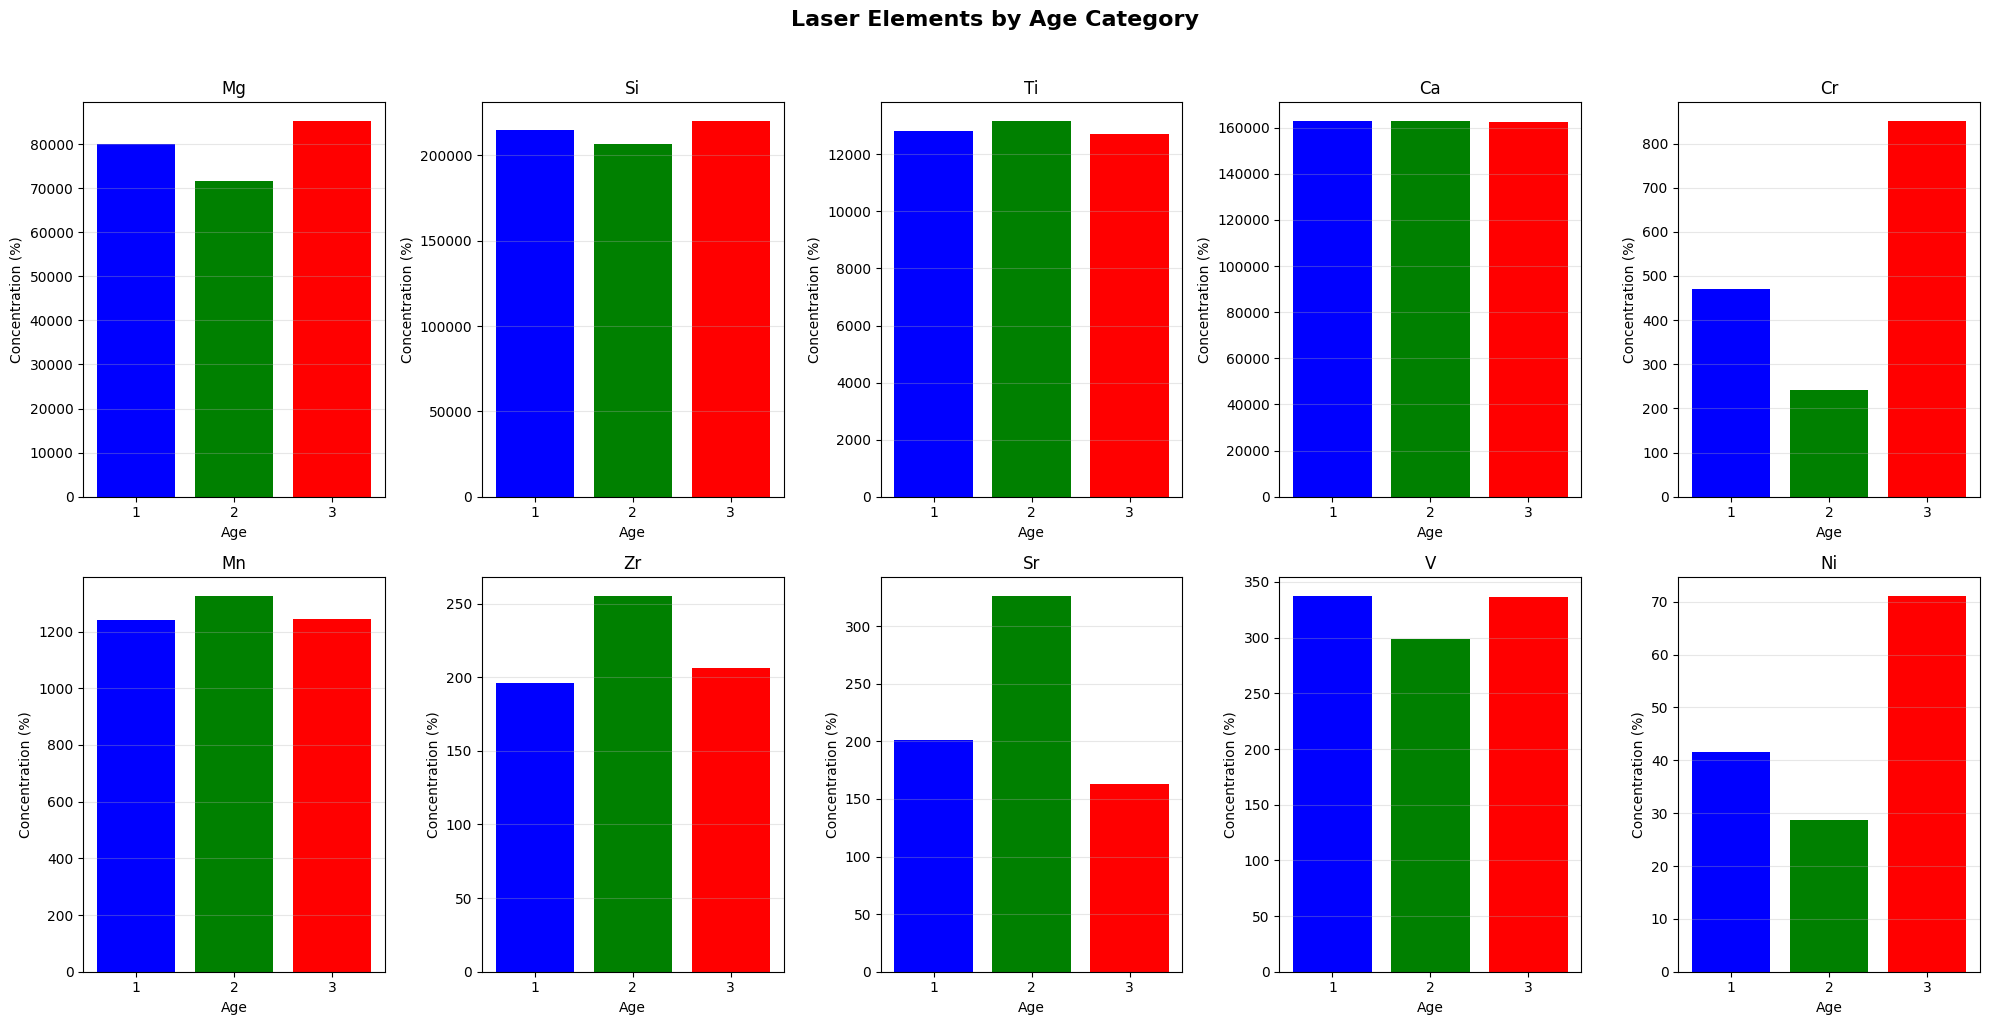

In [ ]:
# Laser - BAR CHARTS: All elements by Age Category

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for idx, element in enumerate(top_elements):
    age_means = df.groupby('T')[element].mean()
    axes[idx].bar(age_means.index.astype(str), age_means.values, color=['blue', 'green', 'red'])
    axes[idx].set_title(element)
    axes[idx].set_xlabel('Age')
    axes[idx].set_ylabel('Concentration (%)')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Laser Elements by Age Category', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(FIG_DIR / "bar_all_laser_elements.png", dpi=300)
plt.show()

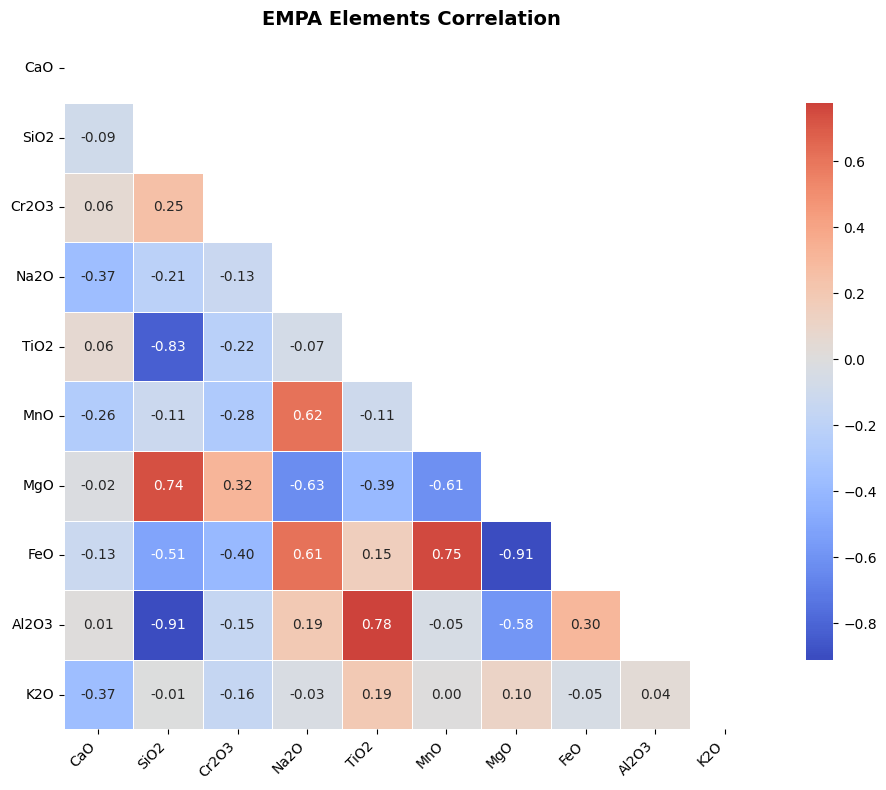

In [ ]:
#
# CORRELATION HEAT MAP - to see which pairs of elements are strongly related
#

# EMPA Heatmap

plt.figure(figsize=(10, 8))
empa_corr = df[EMPA_COLS].corr()  # Calculate correlation matrix

# Create mask for upper triangle
mask = np.triu(np.ones_like(empa_corr, dtype=bool))

sns.heatmap(empa_corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title(f'EMPA Elements Correlation',
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(FIG_DIR / "heatmap_empa.png", dpi=300)
plt.show()


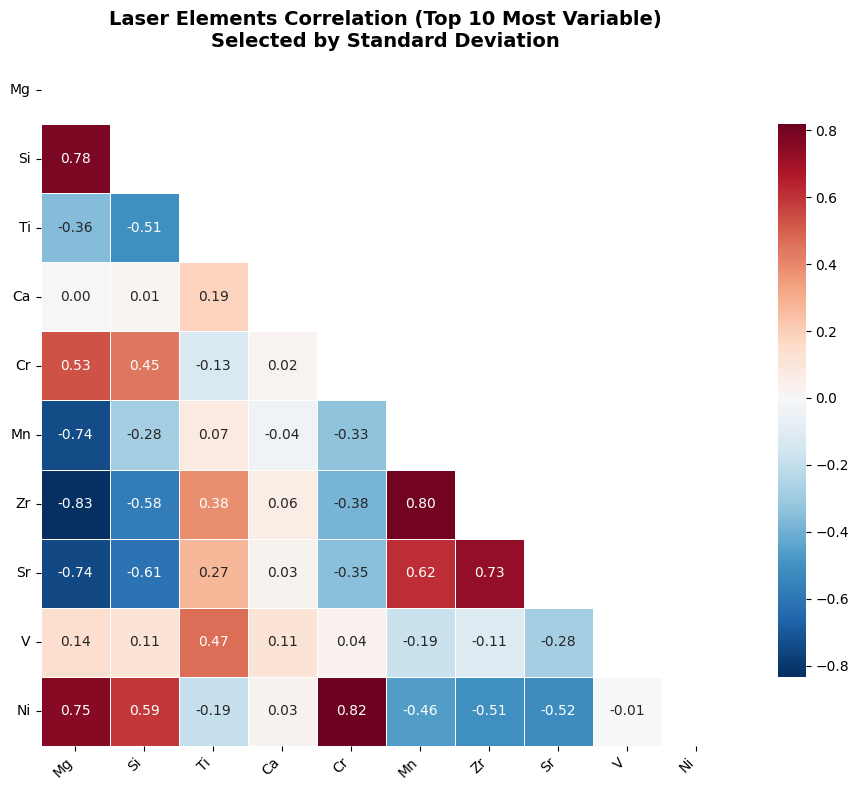

In [ ]:
# Laser Heatmap using Laser's Top 10 Most Variable Element

plt.figure(figsize=(10, 8))
laser_corr_top10 = df[top_elements].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(laser_corr_top10, dtype=bool))

sns.heatmap(laser_corr_top10, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title(f'Laser Elements Correlation (Top {top_n} Most Variable)\nSelected by Standard Deviation',
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(FIG_DIR / "heatmap_laser_top10_variable.png", dpi=300)
plt.show()



1. EMPA Scatter Plots (SiO2 & MgO,TiO2 & Al2O3,MnO & FeO)


/tmp/ipython-input-3280581834.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend(title='Age Category', loc='upper right')


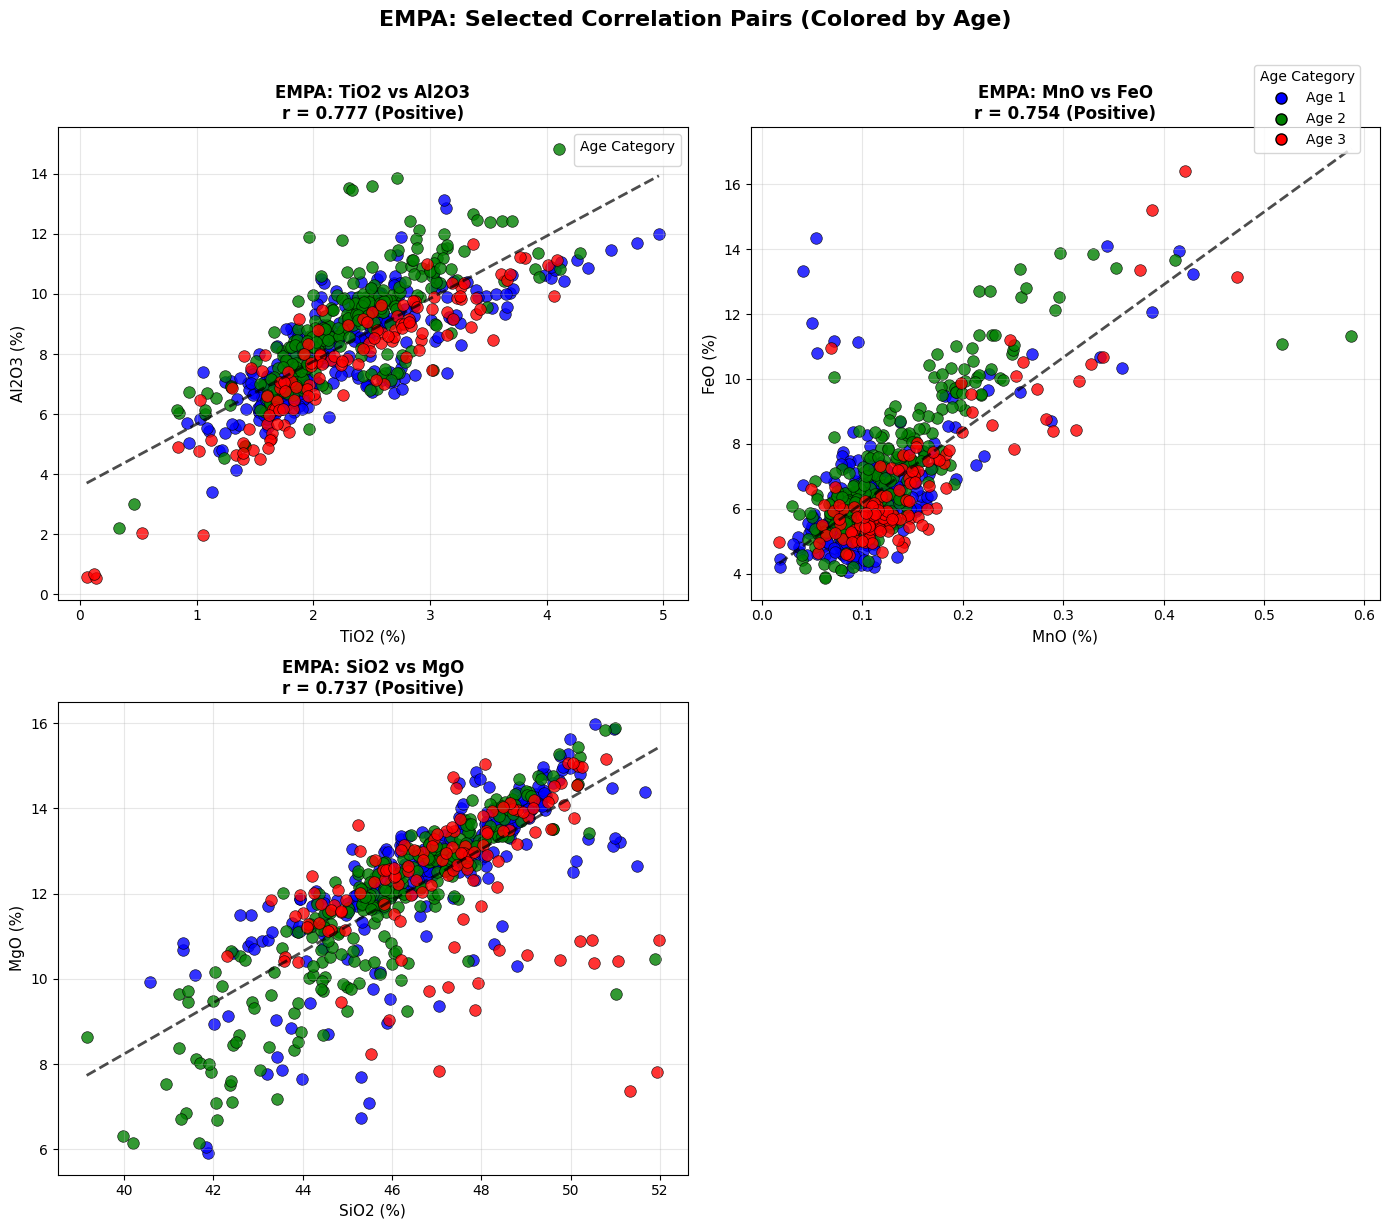

In [ ]:
#
# SCATTER PLOTS - shows visually how paired elements are related
# and whether different age groups separate in feature space.

# ============================================================================
# EMPA - SiO2 vs MgO, TiO2 vs Ai203, MnO vs FeO
# ============================================================================

# Define your selected pairs
empa_selected_pairs = [
    ("TiO2", "Al2O3"), # r=0.78
    ("MnO", "FeO"),    # r=0.75
    ("SiO2", "MgO")    # r=0.74
]

# Define colors for each age category
age_colors = {1: 'blue', 2: 'green', 3: 'red'}
age_labels = {1: 'Age 1', 2: 'Age 2', 3: 'Age 3'}

# 1. EMPA: Create scatter plots for your selected pairs
print("\n1. EMPA Scatter Plots (SiO2 & MgO,TiO2 & Al2O3,MnO & FeO)")

# Setting the frame for the 3 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Create a single legend for all plots
legend_handles = []

# Looping through for the paired elements
for idx, (elem1, elem2) in enumerate(empa_selected_pairs):
    if idx < len(axes):
        # Calculate correlation
        corr_value = df[elem1].corr(df[elem2])
        corr_type = 'Positive' if corr_value > 0 else 'Negative'

        # For each age group (1, 2, and 3),
        # we select the paired element values and plot them in the subplot,
        # using a different color for each age.
        for age in sorted(df['T'].unique()):
            age_data = df[df['T'] == age]
            scatter = axes[idx].scatter(age_data[elem1], age_data[elem2],
                                       c=age_colors[age], s=70, alpha=0.8,
                                       edgecolor='black', linewidth=0.5)

            # Only add to legend handles once
            if idx == 0 and age not in [h.get_label() for h in legend_handles]:
                legend_handles.append(
                    plt.Line2D([0], [0], marker='o', color='w',
                              markerfacecolor=age_colors[age], markersize=8,
                              label=age_labels[age], markeredgecolor='black')
                )

        # Labels and title
        axes[idx].set_xlabel(f'{elem1} (%)', fontsize=11)
        axes[idx].set_ylabel(f'{elem2} (%)', fontsize=11)
        axes[idx].set_title(f'EMPA: {elem1} vs {elem2}\nr = {corr_value:.3f} ({corr_type})',
                           fontsize=12, fontweight='bold')

        # Add grid
        axes[idx].grid(alpha=0.3)

        # Add legend to first plot only
        if idx == 0:
            axes[idx].legend(title='Age Category', loc='upper right')

        # Add trend line
        x = df[elem1].dropna()
        y = df[elem2].dropna()
        if len(x) > 1 and len(y) > 1:
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            x_range = np.linspace(x.min(), x.max(), 100)
            axes[idx].plot(x_range, p(x_range), 'k--', linewidth=2, alpha=0.7)

# Add the legend to the frame (not to a specific subplot)
fig.legend(handles=legend_handles, title='Age Category',
           loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Remove the empty 4th subplot if needed
if len(empa_selected_pairs) < 4:
    fig.delaxes(axes[len(empa_selected_pairs)])

plt.suptitle('EMPA: Selected Correlation Pairs (Colored by Age)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(FIG_DIR / "scatter_empa_selected_pairs.png", dpi=300, bbox_inches='tight')
plt.show()



2. Laser Scatter Plots (Your Selected Pairs)


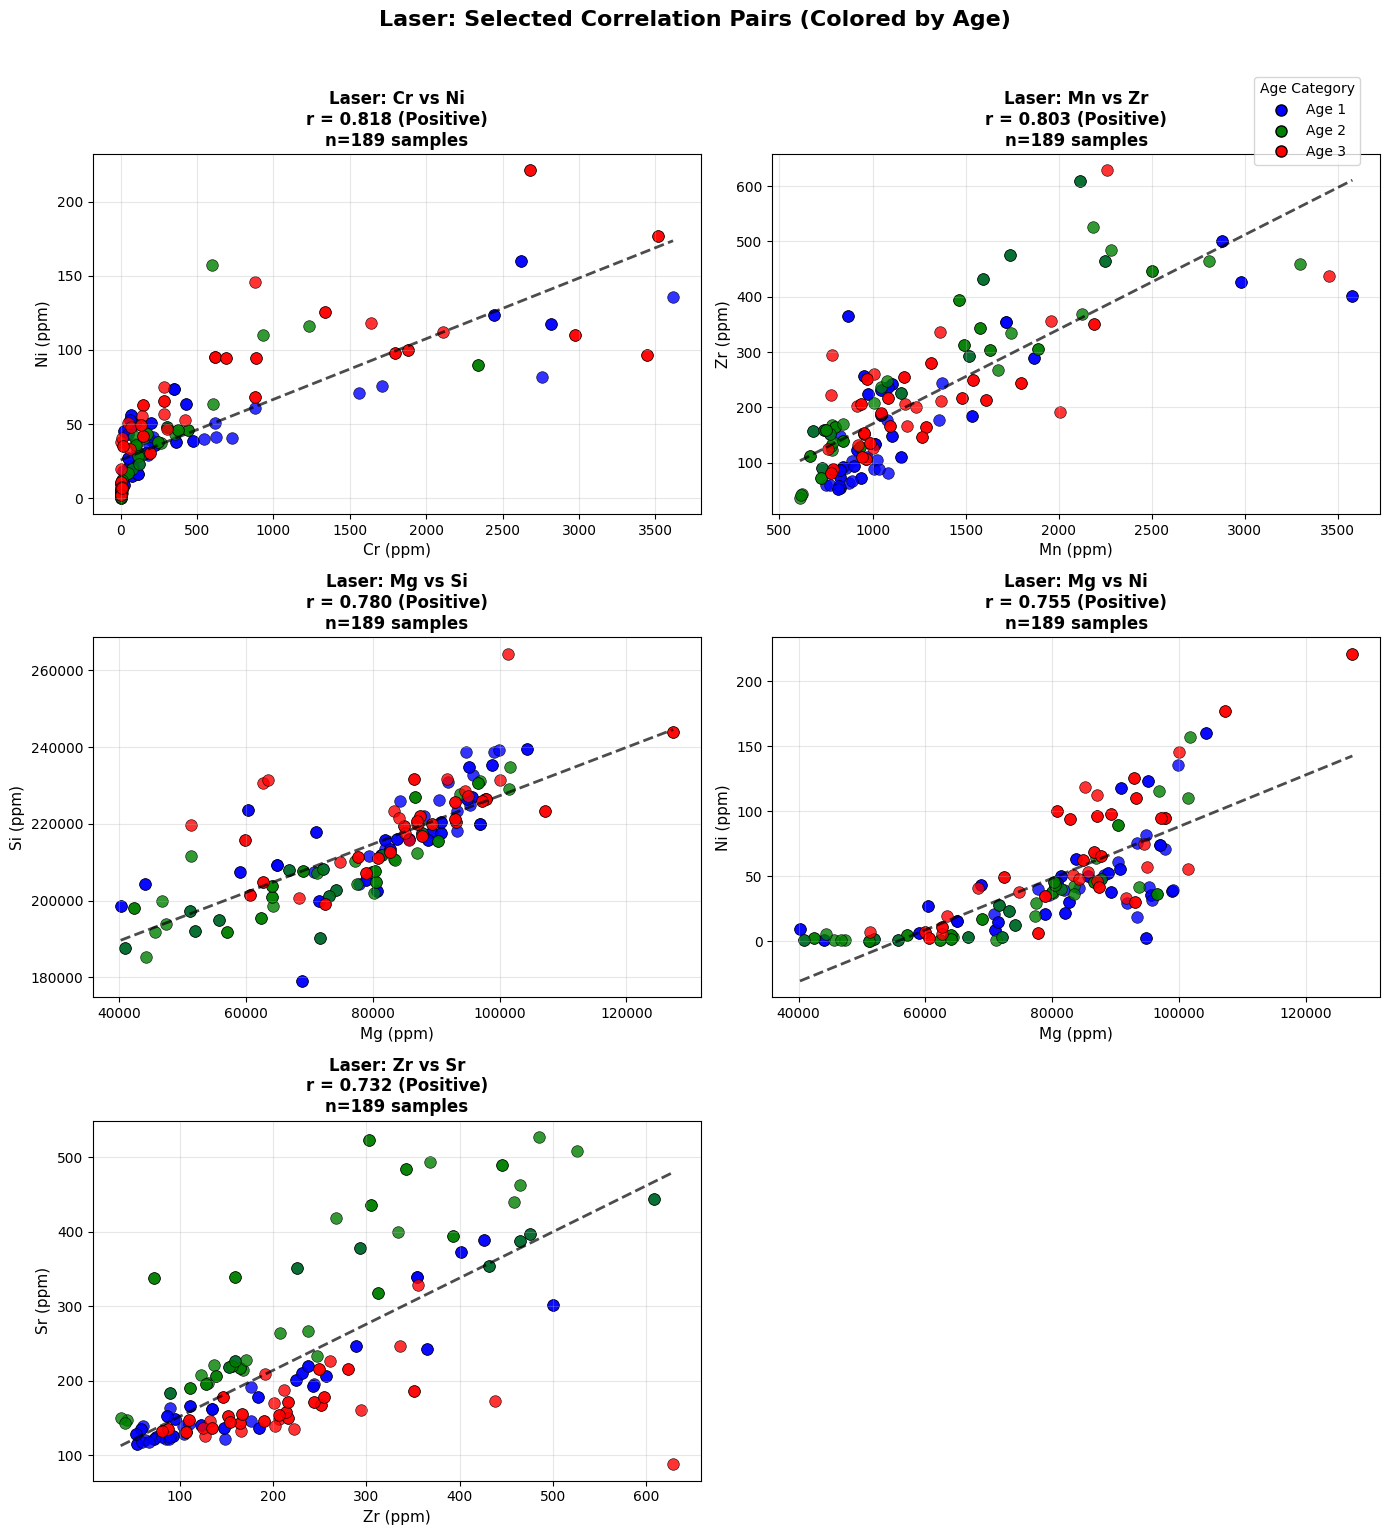

In [ ]:
#
# ============================================================================
# Laser - Mg vs Ni, Mg vs Si, Mn vs Zr, Zr vs Sr, Cr vs Ni
# ============================================================================

laser_selected_pairs = [
    ("Cr", "Ni"), # r=0.82
    ("Mn", "Zr"), # r=0.80
    ("Mg", "Si"), # r=0.78
    ("Mg", "Ni"), # r=0.75
    ("Zr", "Sr")  # r=0.73
]

# Create scatter plots for your selected pairs
print("\n2. Laser Scatter Plots (Your Selected Pairs)")

# Create 3x2 grid (6 subplots total)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Reset legend handles for Laser plots
legend_handles = []

for idx, (elem1, elem2) in enumerate(laser_selected_pairs):
    # Calculate row and column position
    row = idx // 2  # Integer division
    col = idx % 2   # Remainder

    # Get the current axis
    ax = axes[row, col]

    # Filter for samples with Laser data for these elements
    laser_samples = df.dropna(subset=[elem1, elem2])

    if len(laser_samples) > 6:  # Need minimum data
        # Calculate correlation
        corr_value = laser_samples[elem1].corr(laser_samples[elem2])
        corr_type = 'Positive' if corr_value > 0 else 'Negative'

        # Plot each age category separately
        for age in sorted(laser_samples['T'].unique()):
            age_data = laser_samples[laser_samples['T'] == age]
            scatter = ax.scatter(age_data[elem1], age_data[elem2],
                               c=age_colors[age], s=70, alpha=0.8,
                               edgecolor='black', linewidth=0.5)

            # Only add to legend handles once
            if idx == 0 and age not in [h.get_label() for h in legend_handles]:
                legend_handles.append(
                    plt.Line2D([0], [0], marker='o', color='w',
                              markerfacecolor=age_colors[age], markersize=8,
                              label=age_labels[age], markeredgecolor='black')
                )

        # Labels and title
        ax.set_xlabel(f'{elem1} (ppm)', fontsize=11)
        ax.set_ylabel(f'{elem2} (ppm)', fontsize=11)

        # Create title text
        title_text = f'Laser: {elem1} vs {elem2}\nr = {corr_value:.3f} ({corr_type})\nn={len(laser_samples)} samples'
        ax.set_title(title_text, fontsize=12, fontweight='bold')

        # Add grid
        ax.grid(alpha=0.3)

        # Add trend line
        x = laser_samples[elem1]
        y = laser_samples[elem2]
        if len(x) > 1 and len(y) > 1:
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            x_range = np.linspace(x.min(), x.max(), 100)
            ax.plot(x_range, p(x_range), 'k--', linewidth=2, alpha=0.7)

    else:
        ax.text(0.5, 0.5, f'Insufficient data\nOnly {len(laser_samples)} samples',
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Laser: {elem1} vs {elem2}', fontsize=12)

# Hide the 6th (empty) subplot (row 2, column 1 for 0-based indexing)
axes[2, 1].axis('off')

# Add the legend to the figure
fig.legend(handles=legend_handles, title='Age Category',
           loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.suptitle('Laser: Selected Correlation Pairs (Colored by Age)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(FIG_DIR / "scatter_laser_selected_pairs.png", dpi=300, bbox_inches='tight')
plt.show()

#############################################################################
# END OF DATA Visualization
#############################################################################